<a href="https://colab.research.google.com/github/PauloSanchez/Data_science_UL/blob/main/desafio_knn_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis exploratorio

In [ ]:
#Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Archivos ejercicios/abalone.data.csv'
df = pd.read_csv(filename)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Al mirar los tipos de datos aparentemente estan todos OK y no se ven datos nulos.

In [ ]:
valid=df.drop_duplicates()
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


No hay valores dupliados en el set de datos.

In [ ]:
#Reemplazar valores categoricos por numericos.

df.loc[df.Sex=='M','Sex']='1'
df.loc[df.Sex=='F','Sex']='-1'
df.loc[df.Sex=='I','Sex']='0' #Para aquellos que eran indefinido.


df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


#Modelo KNN de clasificación

In [ ]:
#Lo primero es definir las variables que ayudarán a predecir la edad a partir de mediciones fisicas.
#Libreria para el preprosesamiento de datos KNN con Sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X = df.loc[:,['Length','Diameter', 'Height', 'Shell weight', 'Sex']]
y = df.loc[:,['Rings']].values

#Se deben escalar siempre los datos.
scaler = MinMaxScaler()
# Ajusta la escala en X 
scaler.fit_transform(X)
# Transform X
X = scaler.transform(X);

#Preguntar a Jesus por esto para entender bien que hace.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)


#Debemos definir K que es la cantidad de vecinos para el modelo.
knn = KNeighborsClassifier(n_neighbors=3)

#el modelo debe aprender la relacion entre X e Y
knn.fit(X_train, y_train)

#Podemos predecir la clasificación que necesitamos.
prediction = knn.predict(X_test)

# calcular la precisión de la clasificación
score = knn.score(X_test, y_test)
score






/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.22328548644338117

In [ ]:
#Predecir la edad

from sklearn.neighbors import KNeighborsRegressor

X = df.loc[:,['Sex','Length',	'Diameter','Height','Whole weight']]
y = df.loc[:,['Rings']].values

#Split de datos para el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

#Debemos definir K que es la cantidad de vecinos para el modelo.
knn = KNeighborsRegressor(n_neighbors=3)

#el modelo debe aprender la relacion entre X e Y
knn.fit(X_train, y_train)

#Podemos predecir la clasificación que necesitamos.
prediction = knn.predict(X_test)

# calcular la precisión de la clasificación
score = knn.score(X_test, y_test)
score


0.18482783867479602

Text(0, 0.5, 'Predición')

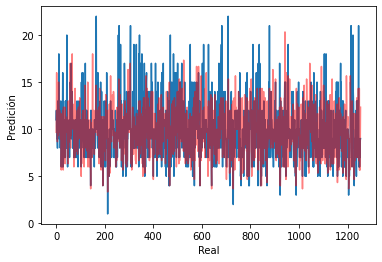

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test)
plt.plot(prediction, alpha=0.5, c='r')
plt.xlabel('Real')
plt.ylabel('Predición')
